# APPLE STOCK PRICES PREDICTION PROJECT

# BUSINESS UNDERSTANDING

### 1.1 Overview

Britam Asset Managers is a leading asset management firm in Kenya, offering a range of investment solutions, including portfolio management, equity investments, and financial advisory services. As they manage various investment portfolios with the goal of optimizing client returns, they are seeking to enhance their investment strategies by incorporating accurate forecasts of Apple Inc.’s stock prices. By integrating these forecasts into their portfolio management processes, Britam aims to optimize asset allocation, make more informed trading decisions, and provide improved financial advisory services to their clients. 

There are, however, several challenges that need to be addressed in this endeavor. Firstly, ensuring the accuracy of the forecasting model is crucial for providing reliable predictions of Apple stock prices. Additionally, the model must be adaptable to varying market conditions and economic events that influence stock prices. To tackle these issues, a time series forecasting model will be developed using historical Apple stock price data from the Alpha Vantage API. This model will provide Britam Asset Managers with valuable insights into future stock prices, thereby facilitating more informed investment decisions and improved portfolio management. The project's success will be evaluated based on the accuracy of its predictions.

In conclusion, by incorporating accurate forecasts of Apple Inc.’s stock prices into Britam Asset Managers' investment strategies represents a significant opportunity for enhancing portfolio management and financial advisory services. By addressing these challenges and focusing on the accuracy of predictions, Britam aims to optimize asset allocation, improve investment decisions, and ultimately enhance client satisfaction.


#### Metrics of Success:
 - Model Accuracy - We aim for at least 80% accuracy
 - ROI - We aim for an annualized ROI of 10-20%

### 1.2 Problem Statement
Britam Asset Managers requires a reliable time series forecasting model to accurately predict Apple Inc. stock prices. Such a model is essential for enhancing the firm's investment strategies by enabling more precise decision-making, optimizing portfolio performance, and delivering valuable insights to clients. By achieving accurate forecasts, Britam aims to not only improve investment outcomes but also strengthen its competitive edge in the asset management industry, ensuring better alignment with market trends and client expectations.

### 1.3 Objectives
The MAIN objective is to develop a Time Series forecasting model to predict Apple stocks prices using historical data.

The specific objectives are:

1. To analyze stock price trends on a weekly, monthly, and yearly basis to identify patterns and seasonal effects that influence Apple stock prices.

2. To investigate how significant events, such as earnings reports, product launches, or macroeconomic changes, affect Apple stock prices and incorporate these insights into the forecasting model.




# DATA UNDERSTANDING

This project analysis uses the  Historical stock price data for Apple Inc., which contains information on Apple products and their Stocks and Interest rates.

The dataset is a folder with `csv files`(apple_stock_and_interest_rates.csv and competition.csv) and `excel files`(apple_products_2009_to_2024.xslx) from Alpha Vantage API.

The major dataset(apple_stock_and_interest_rates.csv) was created between January 02, 2009 and August 02, 2024. 




In [189]:
# import necessary libraries

# Data manipulation
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter future warnings
import warnings
warnings.filterwarnings('ignore')

In [190]:
# load the datasets

products_df= pd.read_excel("data/apple_products_2009_to_2024.xlsx")
stocks_df= pd.read_csv("data/apple_stock_and_interest_rates.csv")
competition_df= pd.read_csv("data/competition.csv")


In [191]:
products_df

,Date,Product
0,2009-06-08,iPhone 3GS
1,2010-01-27,iPad
2,2010-06-07,iPhone 4
3,2010-10-20,MacBook Air (2nd Generation)
4,2011-03-02,iPad 2
5,2011-10-04,iPhone 4S
6,2012-03-07,iPad (3rd Generation)
7,2012-09-12,iPhone 5
8,2013-09-10,iPhone 5C and iPhone 5S
9,2014-09-09,iPhone 6 and iPhone 6 Plus


In [192]:
products_df.columns

Index(['Date', 'Product'], dtype='object')

Products information is contained in the file `apple_products_2009_to_2024.xlsx`. Each line of this file after the header row represents release date entries, and the corresponding apple products.

It contains 26 rows and 2 columns.

In [193]:
stocks_df


,Date,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10
...,...,...,...,...,...,...,...,...
3917,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800,5.33
3918,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,5.33
3919,2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,5.33
3920,2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,5.33


In [194]:
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Interest_Rate'],
      dtype='object')

Stocks and Interest Rates information is contained in the file `apple_stock_and_interest_rates.csv`. Each line of this file after the header row represents date entries, and has the following format: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Interest_Rate'

It contains 3921 rows and 8 columns.

Each column represents:

- Open - the daily opening prices

- High - the daily highest points

- Low - the daily lowest points

- Close - the daily closing prices

- Adj Close - the daily adjusted closing prices

- Volume - the total number of shares traded in daily

- Interest_Rate - the daily interest rates

In [195]:
competition_df

,Date,Event
0,2010-06-04,Samsung Galaxy S release
1,2011-08-24,Steve Jobs resigns as CEO of Apple
2,2011-10-21,Samsung Galaxy Note release
3,2011-10-26,Microsoft Surface RT release
4,2012-04-28,Samsung Galaxy S II release
5,2012-10-20,Google Pixel release
6,2013-04-26,Samsung Galaxy S III release
7,2013-09-21,Samsung Galaxy Note II release
8,2013-10-22,Microsoft Surface 2 and Surface Pro 2 release
9,2014-10-17,Samsung Galaxy Note 4 release


In [196]:
competition_df.columns

Index(['Date', 'Event'], dtype='object')

Competitions(other companies) information is contained in the file `competition.csv` . Each line of this file after the header row represents release date entries, and the corresponding products from other companies.

It contains 26 rows and 2 columns.

# DATA PREPARATION

In [197]:
#view the first 5 rows of the stocks dataset
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10


In [198]:
stocks_df.shape

(3922, 8)

The shape of the stocks and interest rates dataset is 3922 rows and 8 columns.

In [199]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3922 non-null   object 
 1   Open           3922 non-null   float64
 2   High           3922 non-null   float64
 3   Low            3922 non-null   float64
 4   Close          3922 non-null   float64
 5   Adj Close      3922 non-null   float64
 6   Volume         3922 non-null   int64  
 7   Interest_Rate  3922 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 245.3+ KB


`Date` has 3922 non-null objects(typically strings).

`Open, High, Low, Close, Adj Close, Interest_Rate` have 3922 non-null floats.

`Volume` has 3922 non-null integers.

In [200]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
count,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3.922000e+03,3922.000000
mean,61.308329,61.959180,60.685916,61.346539,59.349328,2.564979e+08,1.062733
std,60.034971,60.685516,59.428063,60.078843,60.377672,2.333110e+08,1.586180
min,2.835357,2.928571,2.792857,2.792857,2.361228,2.404830e+07,0.040000
25%,18.043303,18.195892,17.900268,18.039286,15.599337,9.097602e+07,0.100000
50%,31.621250,31.826250,31.406250,31.627500,28.378389,1.592662e+08,0.170000
75%,114.299376,115.784998,112.462500,114.043121,111.612257,3.678500e+08,1.550000
max,236.479996,237.229996,233.089996,234.820007,234.820007,1.880998e+09,5.330000


In [201]:
stocks_df.duplicated().sum()

0

There are no duplicates.

In [202]:
stocks_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Interest_Rate    0
dtype: int64

From the above, it clear that there are no missing values in the stocks and interest rates dataset thus the dataset contains no null values and is complete.

### Convert Date columns to index


In [203]:
class DateIndexConverter:
    def __init__(self, stock_df, products_df, competition_df):
        self.stock_df = stock_df
        self.products_df = products_df
        self.competition_df = competition_df
    
    def convert_to_index(self):
        """Converts the 'Date' column to datetime and sets it as the index."""
        self.stock_df['Date'] = pd.to_datetime(self.stock_df['Date'])
        self.stock_df.set_index('Date', inplace=True)
        
        self.products_df['Date'] = pd.to_datetime(self.products_df['Date'])
        self.products_df.set_index('Date', inplace=True)
        
        self.competition_df['Date'] = pd.to_datetime(self.competition_df['Date'])
        self.competition_df.set_index('Date', inplace=True)
    
    def get_converted_dataframes(self):
        """Returns the dataframes with 'Date' set as the index."""
        return self.stock_df, self.products_df, self.competition_df

In [204]:
converter = DateIndexConverter(stock_df=stocks_df, products_df=products_df, competition_df=competition_df)
converter.convert_to_index()

# Get the converted DataFrames
stock_df, products_df, competition_df = converter.get_converted_dataframes()

In [205]:
print('-----------------------------------------STOCK PRICE------------------------------------------------')
display(stock_df.head())
print('-----------------------------------------APPLE PRODUCTS---------------------------------------------')
display(products_df.head())
print('-----------------------------------------COMPETITORS------------------------------------------------')
display(competition_df.head())

-----------------------------------------STOCK PRICE------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
Date,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10


-----------------------------------------APPLE PRODUCTS---------------------------------------------


,Product
Date,
2009-06-08,iPhone 3GS
2010-01-27,iPad
2010-06-07,iPhone 4
2010-10-20,MacBook Air (2nd Generation)
2011-03-02,iPad 2


-----------------------------------------COMPETITORS------------------------------------------------


,Event
Date,
2010-06-04,Samsung Galaxy S release
2011-08-24,Steve Jobs resigns as CEO of Apple
2011-10-21,Samsung Galaxy Note release
2011-10-26,Microsoft Surface RT release
2012-04-28,Samsung Galaxy S II release


# EXPLORATORY DATA ANALYSIS (EDA)

Here we will perform EDA to explore Apple stock price data along with related datasets such as product release dates and competitor events.

In [206]:
class EDA:
    def __init__(self, stock_price, apple_products, competitors):
        self.stock_price = stock_price
        self.apple_products = apple_products
        self.competitors = competitors

    def univariate_analysis(self):
        # Univariate Analysis: Line plot of 'Close' Prices over time
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        plt.title('Apple Stock Closing Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Univariate Analysis: Line plot of 'Interest Rate' over time
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Interest_Rate'], label='Interest Rate', color='green')
        plt.title('Interest Rates Over Time')
        plt.xlabel('Date')
        plt.ylabel('Interest Rate')
        plt.legend()
        plt.show()

    def bivariate_analysis(self):
        # Bivariate Analysis: Close vs. Interest Rate
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Interest_Rate', y='Close', data=self.stock_price)
        plt.title('Apple Stock Closing Prices vs. Interest Rates')
        plt.xlabel('Interest Rate')
        plt.ylabel('Close Price')
        plt.show()

        # Bivariate Analysis: Close Prices Marked with Apple Product Release Dates
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        for idx, row in self.apple_products.iterrows():
            plt.axvline(x=row.name, color='green', linestyle='--', alpha=0.7, label=row['Product'])
        plt.title('Apple Stock Closing Prices with Product Release Dates')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.show()

        # Bivariate Analysis: Close Prices Marked with Samsung Release Dates
        samsung_events = self.competitors[self.competitors['Event'].str.contains("Samsung", case=False)]
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        for idx, row in samsung_events.iterrows():
            plt.axvline(x=row.name, color='red', linestyle='--', alpha=0.7, label=row['Event'])
        plt.title('Apple Stock Closing Prices with Samsung Product Release Dates')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Bivariate Analysis: Close Prices Marked with Google Release Dates
        google_events = self.competitors[self.competitors['Event'].str.contains("Google", case=False)]
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        for idx, row in google_events.iterrows():
            plt.axvline(x=row.name, color='orange', linestyle='--', alpha=0.7, label=row['Event'])
        plt.title('Apple Stock Closing Prices with Google Product Release Dates')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Bivariate Analysis: Close Prices Marked with Microsoft Release Dates
        microsoft_events = self.competitors[self.competitors['Event'].str.contains("Microsoft", case=False)]
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        for idx, row in microsoft_events.iterrows():
            plt.axvline(x=row.name, color='purple', linestyle='--', alpha=0.7, label=row['Event'])
        plt.title('Apple Stock Closing Prices with Microsoft Product Release Dates')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Bivariate Analysis: Close Prices Marked with the Date Steve Jobs Retired
        steve_jobs_retired = self.competitors[self.competitors['Event'].str.contains("Steve Jobs", case=False)]
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_price.index, self.stock_price['Close'], label='Close Price', color='blue')
        for idx, row in steve_jobs_retired.iterrows():
            plt.axvline(x=row.name, color='black', linestyle='--', alpha=0.7, label=row['Event'])
        plt.title('Apple Stock Closing Prices with Steve Jobs Retirement Date')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()


## Univariate analysis

We will plot:
- Apple Stock Closing Prices over time.
- Interest Rates over time.

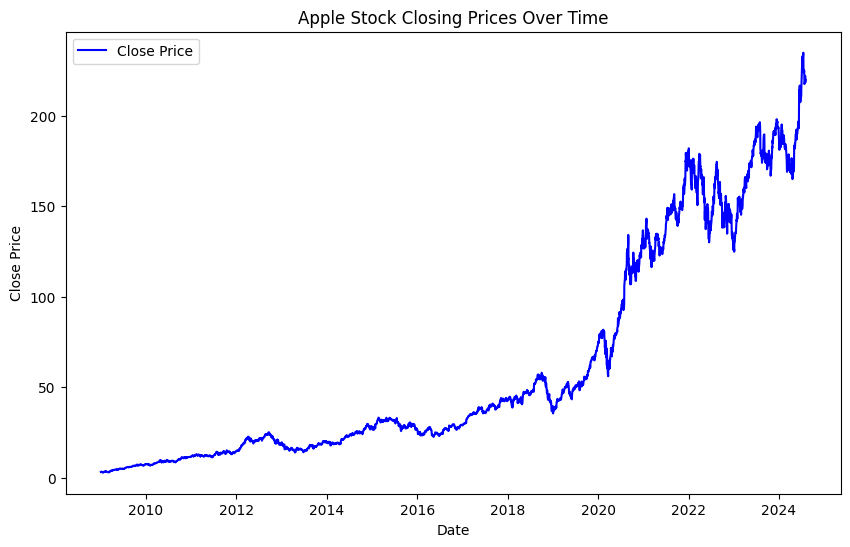

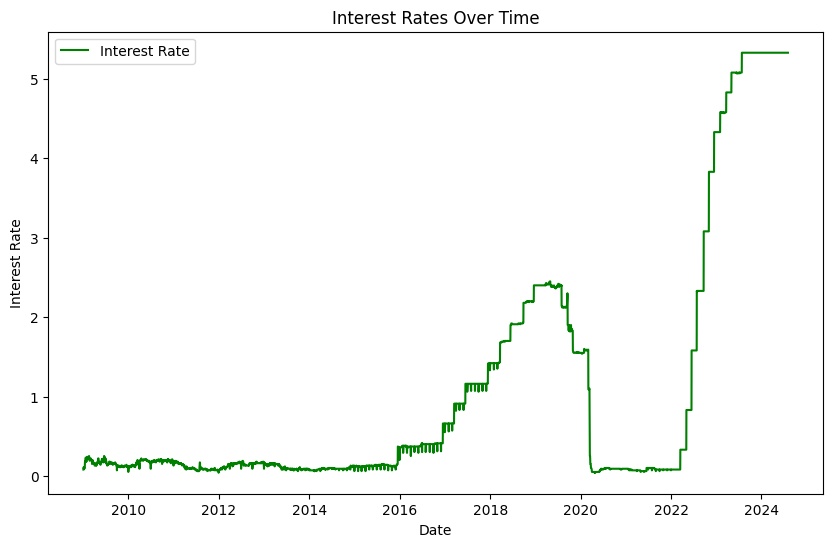

In [207]:
# Initialize the EDA class
eda = EDA(stock_price=stocks_df, apple_products=products_df, competitors=competition_df)

# Run Univariate Analysis
eda.univariate_analysis()

### Conclusion:
1. Apple’s stock exhibits a long-term upward trend, with significant growth phases after 2018 showing rapid increases in price.
2. Despite fluctuations in interest rates, Apple’s stock price grows consistently, indicating that Apple’s performance is not heavily influenced by interest rates.


## Bivariate analysis

We will plot:
- A scatter plot of Apple Stock Closing Prices vs. Interest Rates.
- Apple Stock Closing Prices with Product Release Dates.
- Apple Stock Closing Prices with Samsung Product Release Dates.
- Apple Stock Closing Prices with Google Product Release Dates.
- Apple Stock Closing Prices with Microsoft Product Release Dates.
- Apple Stock Closing Prices with Steve Jobs Retirement Date.

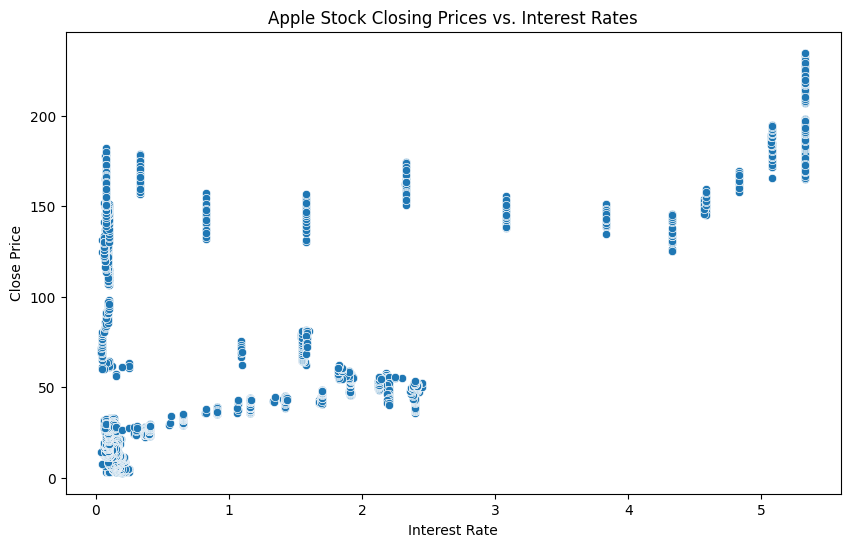

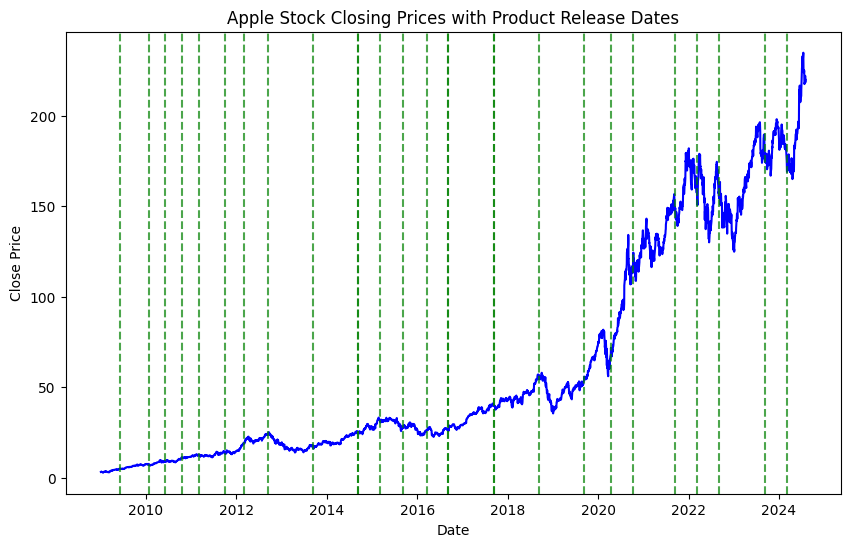

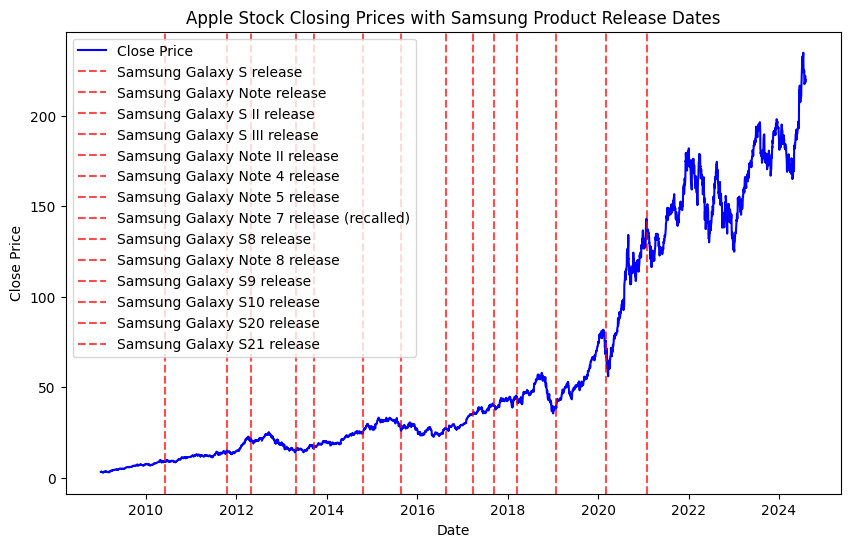

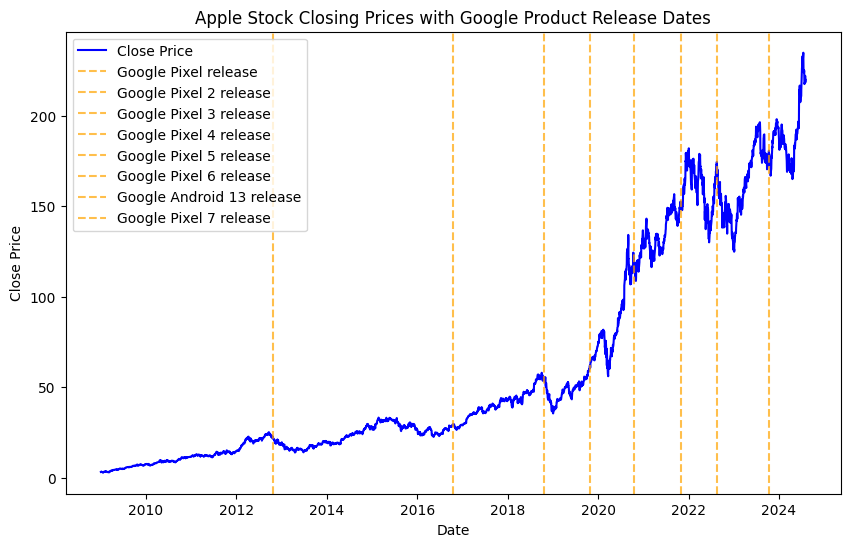

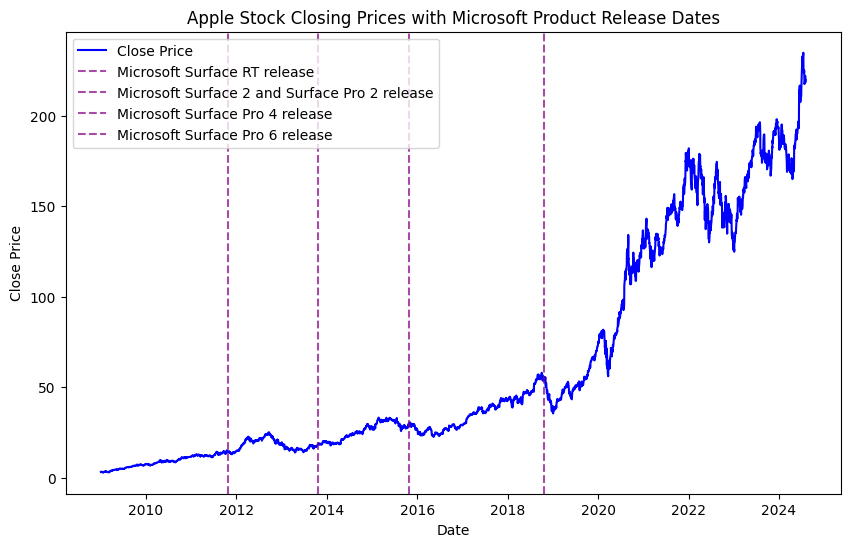

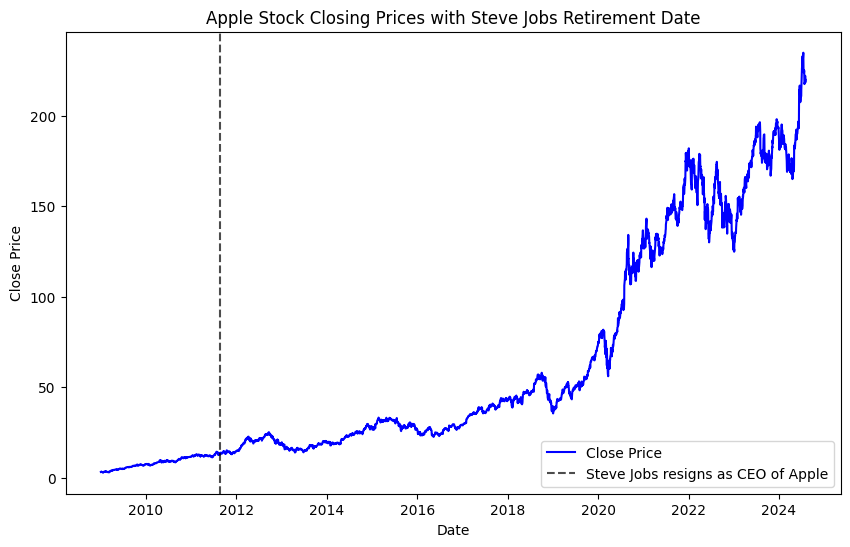

In [208]:
# Run Bivariate Analysis
eda.bivariate_analysis()

### Conclusion:

1. There is no strong correlation between Apple’s stock price and interest rates, suggesting that other factors, such as product success, drive Apple’s stock performance.
2. Apple's stock price consistently trended upward despite frequent product launches, showing that while these releases contribute to success, they do not cause immediate or drastic price changes.
3. Samsung's product releases did not significantly affect Apple's stock, which maintained its upward trend, indicating Apple's resilience to competitor actions.
4. Google’s product launches had little impact on Apple’s stock, which continued its upward trajectory, demonstrating Apple’s strong, independent market performance.
5. Microsoft’s product launches did not noticeably affect Apple’s stock, which continued to trend upward.
6. Despite Steve Jobs' resignation, Apple's stock continued to rise, reflecting strong investor confidence and smooth leadership transition. Significant growth occurred, particularly after 2018.

#### Seasonality:

- Product Launch Cycles: Apple’s stock shows seasonality linked to product launches, particularly with new iPhones released in September, which can drive up stock prices due to increased consumer interest.
- Holiday Sales: Stock prices often rise during the holiday season, reflecting strong sales in consumer electronics.

## MODELLING 

### Baseline Model(Random Forest)

In [209]:
# Importing libraries for Baseline Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score,roc_curve, auc

In [210]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
Date,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10


In [211]:
stock_df['Tomorrow'] = stocks_df['Close'].shift(-1)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_Rate,Tomorrow
Date,,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08,3.377857
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11,3.322143
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09,3.250357
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11,3.310714
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10,3.235000


In [212]:
stock_df['Target'] = (stock_df['Tomorrow'] > stock_df['Close']).astype(int)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_Rate,Tomorrow,Target
Date,,,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08,3.377857,1
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11,3.322143,0
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09,3.250357,0
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11,3.310714,1
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10,3.235000,0


In [213]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=1)
train = stock_df.iloc[:-785]
test = stock_df.iloc[-785:]
predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [214]:
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
preds.head()

Date
2021-06-21    0
2021-06-22    0
2021-06-23    0
2021-06-24    0
2021-06-25    0
dtype: int32

#### Model Evaluation

In [215]:
# Calculate precision score
precision = precision_score(test['Target'], preds)

# Evaluate model
accuracy = accuracy_score(test['Target'], preds)
precision = precision_score(test['Target'], preds)

print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')

Accuracy Score: 0.4789808917197452
Precision Score: 0.8333333333333334


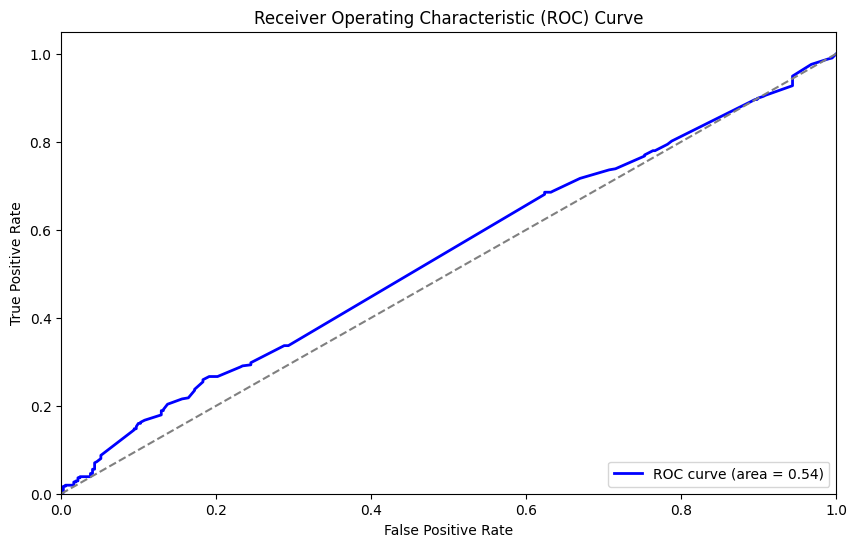

In [216]:
# Predicting probabilities instead of class labels
probs = model.predict_proba(test[predictors])[:, 1]  

# Calculating ROC curve
fpr, tpr, _ = roc_curve(test['Target'], probs)

# Calculating the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The AUC of 0.54 suggests that the model isn't capturing these temporal patterns well. This means the model is struggling to predict future price of apple based on past patterns.

### Second Model(Facebook Prophet)

In [217]:
# importing libraries for this model 
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

In [218]:
# Preparing the data for Prophet
df = stock_df.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

#### Incorporating US Holidays

In [219]:
# Initializing the Prophet model
model = Prophet()

# Adding US holidays to the model
model.add_country_holidays(country_name='US')

# Fitting the model
model.fit(df)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\Nduta\AppData\Local\Temp\tmp3lu_8bge\0tw3217j.json
DEBUG:cmdstanpy:input tempfile: C:\Users\Nduta\AppData\Local\Temp\tmp3lu_8bge\z6us0ih7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\Nduta\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=60378', 'data', 'file=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\0tw3217j.json', 'init=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\z6us0ih7.json', 'output', 'file=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\prophet_model9hymuz8g\\prophet_model-20240812205927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

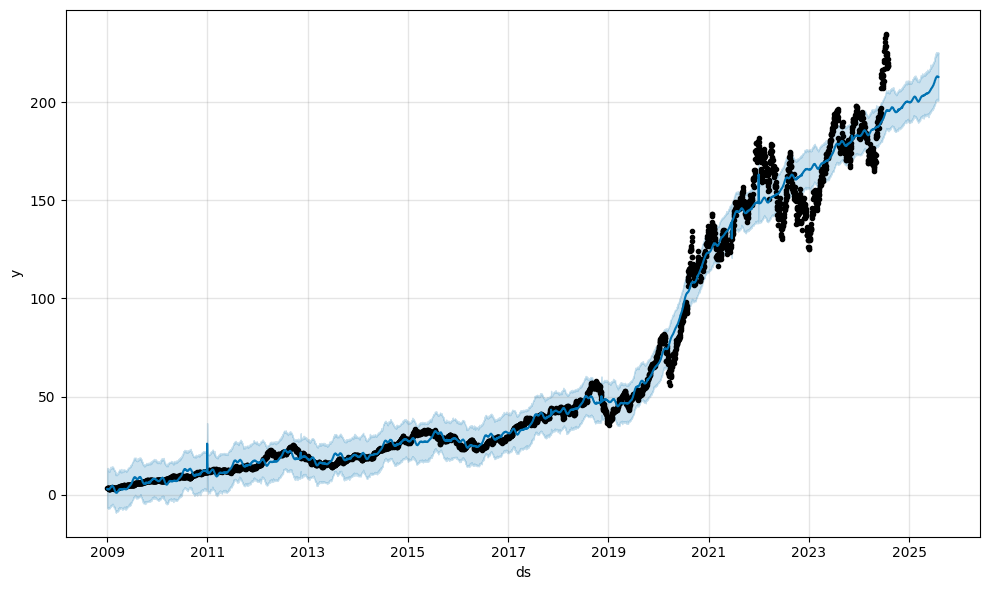

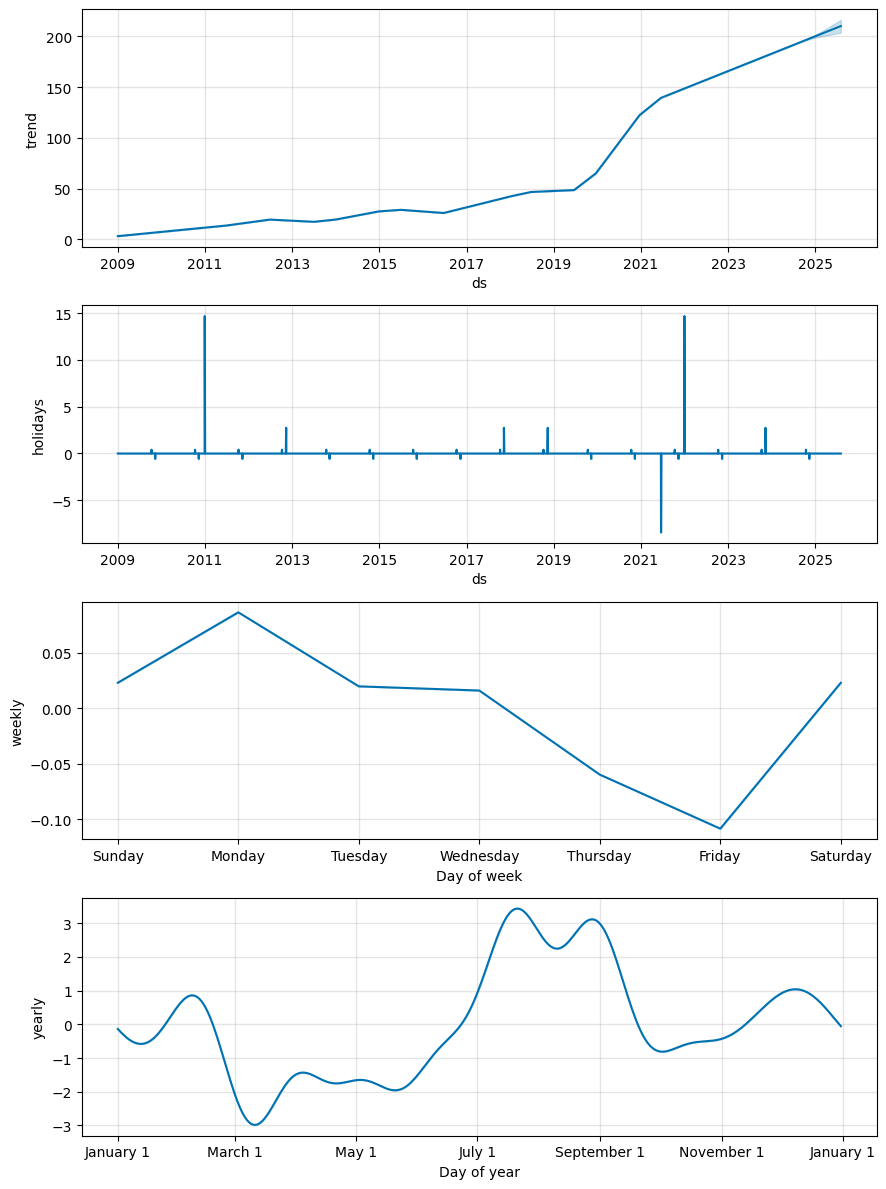

In [220]:
# Creating a DataFrame with future dates
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

model.plot(forecast)
plt.show()

# Plot the forecast components (trend, weekly, yearly seasonality, and holidays)
model.plot_components(forecast)
plt.show()

From the first chart, the black 'line' indicates the actual price, while the blue line indicates the forecasted prices. The shaded region represents the 95% confidence interval. These intervals indicate the range within which the true values are likely to fall. The wider the interval, the greater the uncertainty. 
The Trend Plot represents a line showing the general upward or downward trend in the data. The holiday chart represents bars indicating the effect of holidays or special events. While the weekly and yearly seasonality charts are plots showing the typical variation in data throughout the week and across different months or seasons of the year.

#### Model Evaluation

In [221]:
# Calculating MAPE
mape = mean_absolute_percentage_error(df['y'], forecast['yhat'][:len(df)])
print(f'MAPE: {mape:.2f}')

MAPE: 0.10


The Mean Absolute Percentage Error (MAPE) of the model is 0.10, or 10%. This indicates that the model’s predictions are, on average, within 10% of the actual values. However, depending on the specific requirements and sensitivity of the forecasting task, further refinement might be considered to achieve even higher precision if needed.

#### Incorporating additional Features

In [222]:
# Ensuring the 'Date' column in products_df is named 'ds'
products_df.reset_index(inplace=True)
products_df.rename(columns={'Date': 'ds'}, inplace=True)

# Adding a Product_Launch column
products_df['Product_Launch'] = 1

In [223]:
stock_df.reset_index(inplace=True)
stock_df.rename(columns={'Date': 'ds'}, inplace=True)

In [224]:
# Merging product launch feature with the main DataFrame
df = df.merge(products_df[['ds', 'Product_Launch']], how='left', on='ds')

# Filling missing values with 0
df['Product_Launch'].fillna(0, inplace=True)

# Merging interest rates with the main DataFrame
df = df.merge(stock_df[['ds', 'Interest_Rate']], how='left', on='ds')


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\Nduta\AppData\Local\Temp\tmp3lu_8bge\ox4y4psl.json
DEBUG:cmdstanpy:input tempfile: C:\Users\Nduta\AppData\Local\Temp\tmp3lu_8bge\qo3zqw65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\Nduta\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=47417', 'data', 'file=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\ox4y4psl.json', 'init=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\qo3zqw65.json', 'output', 'file=C:\\Users\\Nduta\\AppData\\Local\\Temp\\tmp3lu_8bge\\prophet_model1z2cdj9y\\prophet_model-20240812205931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

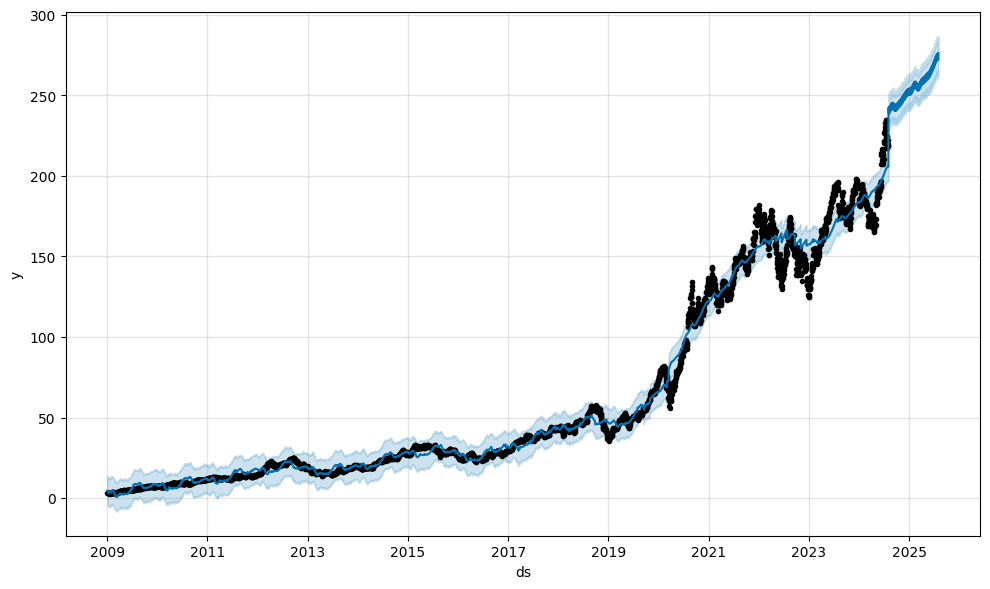

In [225]:
model = Prophet()

# Adding regressors
model.add_regressor('Interest_Rate')
model.add_regressor('Product_Launch')

model.fit(df)

# Creating future dataframe
future = model.make_future_dataframe(periods=365)

# Adding regressors to the future dataframe
future = future.merge(df[['ds', 'Interest_Rate', 'Product_Launch']], how='left', on='ds')

# Filling missing values in the future dataframe
future['Interest_Rate'].fillna(df['Interest_Rate'].mean(), inplace=True)
future['Product_Launch'].fillna(0, inplace=True)

forecast = model.predict(future)

fig = model.plot(forecast)
plt.show()

### Third Model(LSTM Model)

In [226]:
#Importing libraries for this model
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.models import load_model

In [227]:
df = pd.read_csv('data/apple_stock_and_interest_rates.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Interest_Rate
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.740173,746015200,0.08
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.855818,1181608400,0.11
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.808715,1289310400,0.09
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.748024,753048800,0.11
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.799052,673500800,0.10


In [228]:
df = df.reset_index()[['Date', 'Close']]
df.head()

,Date,Close
0,2009-01-02,3.241071
1,2009-01-05,3.377857
2,2009-01-06,3.322143
3,2009-01-07,3.250357
4,2009-01-08,3.310714


In [229]:
#Create a new df with only the 'Close' column
data = df.filter(['Close'])
#Convert df to np array
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

3138

In [230]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00193173],
       [0.00252126],
       [0.00228114],
       ...,
       [0.94509261],
       [0.92906   ],
       [0.93552476]])

In [231]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00193173, 0.00252126, 0.00228114, 0.00197175, 0.00223188,
       0.00190557, 0.00161004, 0.00146381, 0.00109747, 0.00079732,
       0.0006357 , 0.        , 0.00071266, 0.00156386, 0.00156386,
       0.00176088, 0.00192865, 0.00246277, 0.00227806, 0.0018363 ,
       0.00204871, 0.00227498, 0.00236271, 0.00281063, 0.00331242,
       0.00374186, 0.00302151, 0.00286604, 0.00324316, 0.00322623,
       0.00251356, 0.00248893, 0.0019148 , 0.002001  , 0.00134683,
       0.00185477, 0.00199484, 0.00169161, 0.00171008, 0.00149921,
       0.00156539, 0.00199638, 0.00163774, 0.00109285, 0.00075576,
       0.00160542, 0.0022288 , 0.0027937 , 0.00272905, 0.00265055,
       0.00330319, 0.00358948, 0.00360488, 0.00360026, 0.00453457,
       0.00435602, 0.00435448, 0.00487474, 0.00440989, 0.00404663])]
[0.004143606114558612]

[array([0.00193173, 0.00252126, 0.00228114, 0.00197175, 0.00223188,
       0.00190557, 0.00161004, 0.00146381, 0.00109747, 0.00079732,
       0.0006357 , 0.        , 0.0

In [232]:
#Covert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

The LSTM network expects the input to be 3D in the form of number of samples,features and time steps but right now our x_train dataset is 2D so we need to reshape our data.

In [233]:
#Reshape data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [234]:
x_train.shape

(3078, 60, 1)

In [235]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [236]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [237]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

3078/3078 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - loss: 8.5039e-04


In [238]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [239]:
#Covert data into a np array
x_test = np.array(x_test)

In [240]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(784, 60, 1)

In [241]:
model.save('model.h5')

In [242]:
# Load the trained model
model = load_model('model.h5')

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [243]:
#Get the rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.2216187788515676

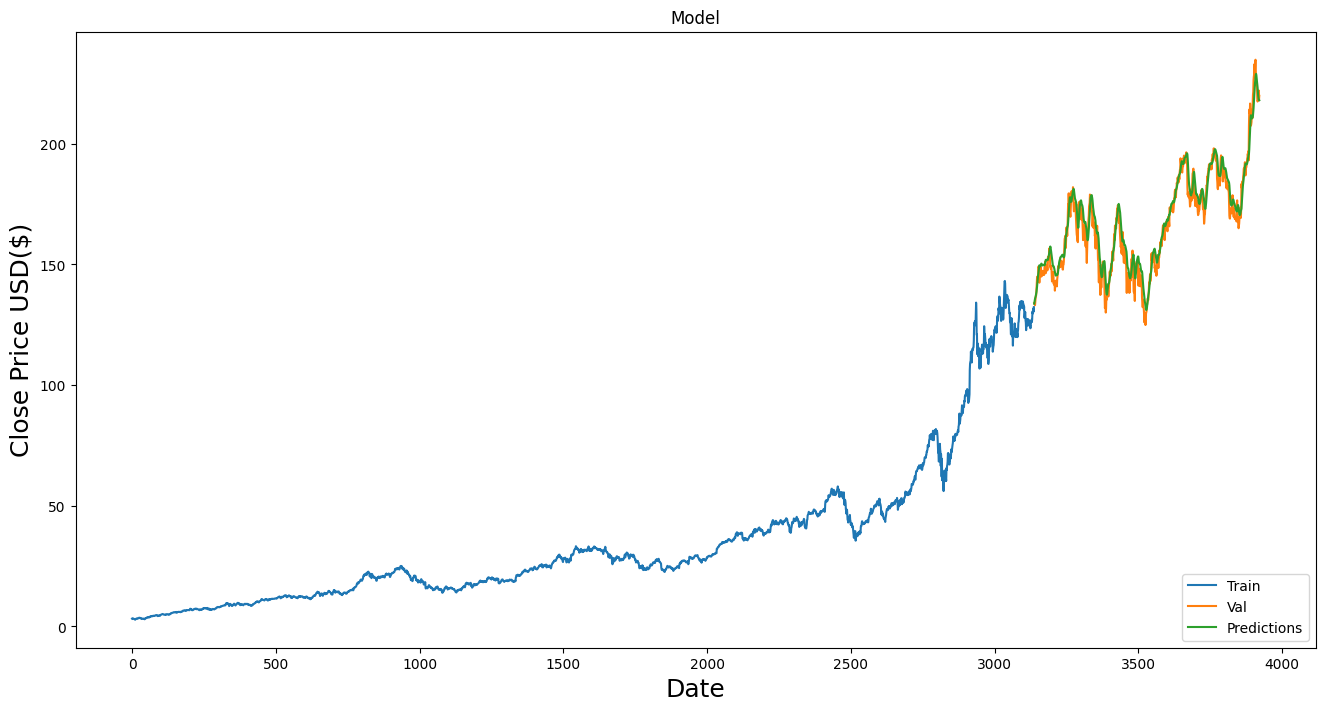

In [244]:
## Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [245]:
valid

,Close,Predictions
3138,133.979996,133.757706
3139,133.699997,134.535431
3140,133.410004,135.256332
3141,133.110001,135.826996
3142,134.779999,136.212463
...,...,...
3917,218.240005,220.119461
3918,218.800003,218.973145
3919,222.080002,218.221832
3920,218.360001,218.182800
